### Introduction

The King County housing market presents a rich dataset for exploring real estate trends and price prediction. This final project leverages Python-based data analytics tools to examine over 21,000 property records, including features like square footage, number of bedrooms and bathrooms, location coordinates, and renovation history.

We begin by cleaning the dataset, addressing missing values in the `bedrooms` and `bathrooms` columns. Next, we perform exploratory data analysis (EDA) to visualize relationships between features and price. Finally, we build regression models to predict house prices based on key attributes.

This notebook is executed in the JupyterLite environment provided by Skills Network Labs, ensuring a cloud-based and accessible workflow. Screenshots of final outputs—including charts, tables, and model results—are saved for peer review submission.

By the end of this project, we aim to:
- Identify the most influential features affecting house prices
- Build a reliable predictive model using regression techniques
- Provide insights that could inform real-world housing decisions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv")

In [6]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [9]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [10]:
df['bathrooms'].median()

2.25

In [11]:
df['bedrooms'].median()

3.0

In [12]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)


In [13]:
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# Display data types of each column
df.dtypes


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [15]:
# Drop 'id' and 'Unnamed: 0' columns from the DataFrame
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Display statistical summary of the dataset
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372646,2.115798,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926423,0.768823,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
# Count the number of houses for each unique floor value
floor_counts = df['floors'].value_counts().to_frame()

# Display the result
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


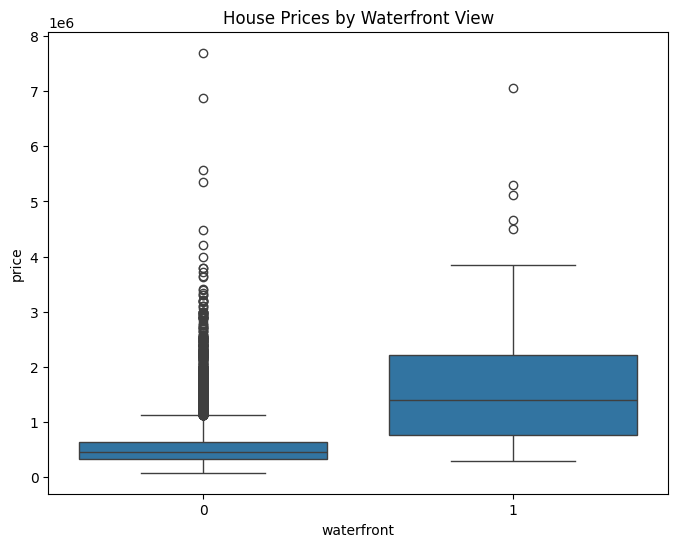

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size for better visibility
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x='waterfront', y='price', data=df)

# Add a title for clarity
plt.title('House Prices by Waterfront View')

# Display the plot
plt.show()


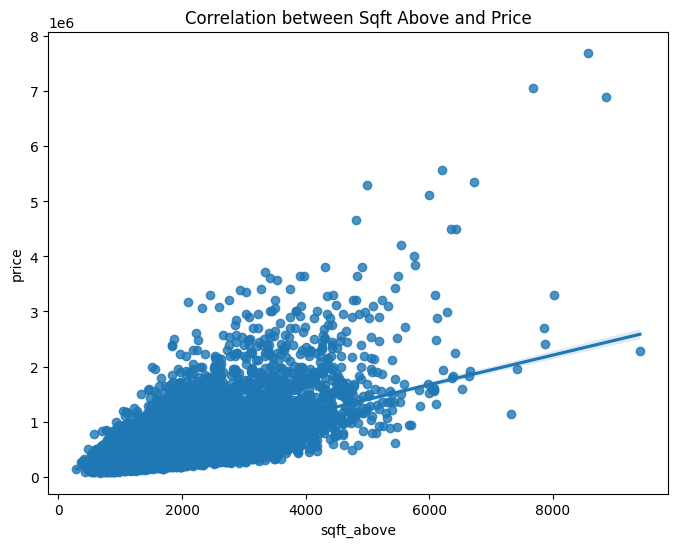

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(8, 6))

# Create the regression plot
sns.regplot(x='sqft_above', y='price', data=df)

# Add a title
plt.title('Correlation between Sqft Above and Price')

# Display the plot
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
lm = LinearRegression()

# Define the feature and target
X = df[['sqft_living']]
y = df['price']

# Fit the model
lm.fit(X, y)

# Calculate and display the R² score
r2_score = lm.score(X, y)
print("R² score:", r2_score)


R² score: 0.4928532179037931


In [20]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
lm = LinearRegression()

# Define the feature list
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define X and y
X = df[features]
y = df['price']

# Fit the model
lm.fit(X, y)

# Calculate and display the R² score
r2_score = lm.score(X, y)
print("R² score:", r2_score)


R² score: 0.6576057860230844


In [21]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define the feature list
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define X and y
X = df[features]
y = df['price']

# Create the pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipe.fit(X, y)

# Calculate and display the R² score
r2_score = pipe.score(X, y)
print("R² score:", r2_score)


R² score: 0.7508988823169684


In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Define the feature list
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define X and y
X = df[features]
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Calculate and display the R² score on the test data
r2_score = ridge_model.score(X_test, y_test)
print("R² score on test data:", r2_score)


R² score on test data: 0.6459307239918921


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Define the feature list
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Define X and y
X = df[features]
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform second-order polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Calculate and display the R² score on the test data
r2_score = ridge_model.score(X_test_poly, y_test)
print("R² score on test data:", r2_score)


R² score on test data: 0.7543496408270625


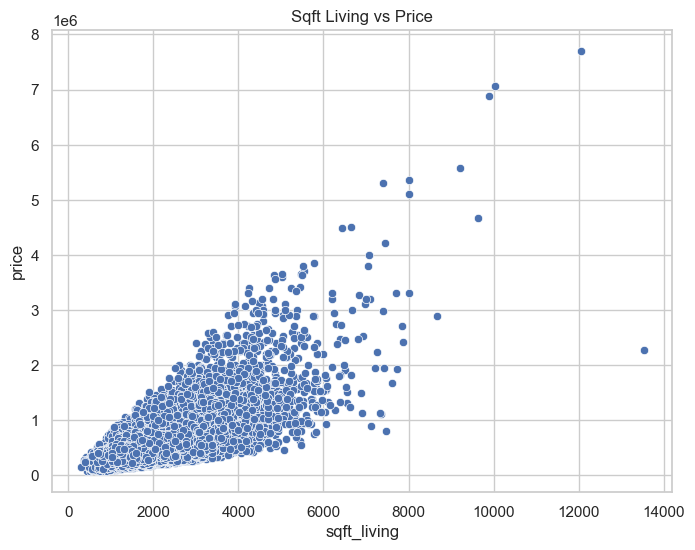

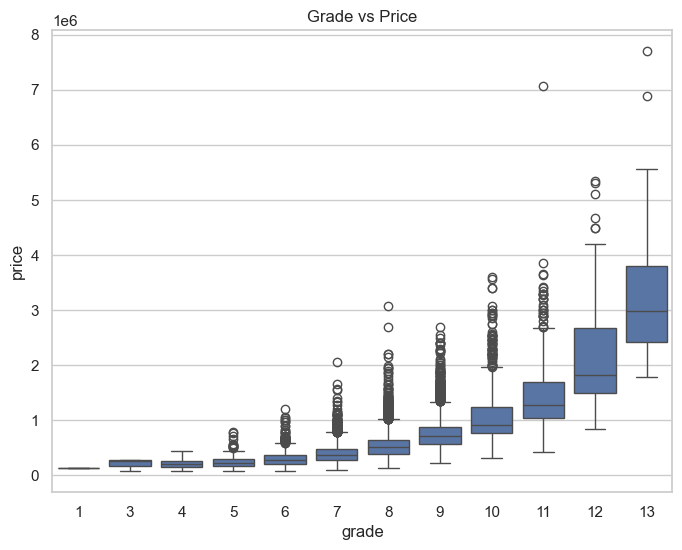

ValueError: could not convert string to float: '20141013T000000'

<Figure size 1000x800 with 0 Axes>

In [24]:
#Visualizing Relationships


import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Scatter plot: sqft_living vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Sqft Living vs Price')
plt.show()

# Boxplot: grade vs price
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('Grade vs Price')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price')
plt.show()


In [25]:
#House Price Prediction System


from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df['price']

# Create pipeline with scaling and Ridge regression
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))
])

# Fit the model
model_pipeline.fit(X, y)

# Function to predict house price
def predict_house_price(input_data):
    """
    input_data: dict with keys matching feature names
    returns: predicted price
    """
    import pandas as pd
    input_df = pd.DataFrame([input_data])
    predicted_price = model_pipeline.predict(input_df)[0]
    return round(predicted_price, 2)

# Example usage
sample_input = {
    "floors": 2,
    "waterfront": 0,
    "lat": 47.6,
    "bedrooms": 3,
    "sqft_basement": 500,
    "view": 0,
    "bathrooms": 2,
    "sqft_living15": 1800,
    "sqft_above": 1500,
    "grade": 7,
    "sqft_living": 2000
}

print("Predicted House Price:", predict_house_price(sample_input))


Predicted House Price: 471616.45


In [27]:
#Input and Output Example

import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Define the features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Step 2: Create and train the pipeline model
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))
])
model_pipeline.fit(X, y)

# Step 3: Define the prediction function
def predict_house_price(input_data):
    """
    Predicts house price based on input features.
    
    Parameters:
    input_data (dict): Dictionary with keys matching feature names
    
    Returns:
    float: Predicted house price
    """
    input_df = pd.DataFrame([input_data])
    predicted_price = model_pipeline.predict(input_df)[0]
    return round(predicted_price, 2)

# Step 4: Example input
sample_input = {
    "floors": 2,
    "waterfront": 0,
    "lat": 47.6,
    "bedrooms": 3,
    "sqft_basement": 500,
    "view": 0,
    "bathrooms": 2,
    "sqft_living15": 1800,
    "sqft_above": 1500,
    "grade": 7,
    "sqft_living": 2000
}

# Step 5: Predict and display result
predicted = predict_house_price(sample_input)
print("Predicted House Price:", predicted)


Predicted House Price: 471616.45


In [30]:
#Updated Code with User Input


import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Train the model
X = df[features]
y = df['price']

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))
])
model_pipeline.fit(X, y)

# Function to collect input and predict price
def predict_from_user_input():
    print("🔍 Enter house details to predict price:")
    input_data = {}
    for feature in features:
        value = float(input(f"{feature}: "))
        input_data[feature] = value
    
    input_df = pd.DataFrame([input_data])
    predicted_price = model_pipeline.predict(input_df)[0]
    print(f"\n💰 Predicted House Price: ${round(predicted_price, 2)}")

# Run the prediction
predict_from_user_input()


🔍 Enter house details to predict price:



💰 Predicted House Price: $2300142995111.46
